# 

In [47]:
from time import time, sleep
import numpy as np
import random
import matplotlib.pyplot as plt

In [48]:
def find_even_numbers(data):
    counter = 0
    for i in data:
        if i % 2 == 0:
            counter += 1
    return counter

In [49]:
def bubble_sort(data):
    for i in range(len(data) - 1):
        for j in range(len(data) - 1 - i):
            if data[j] > data[j + 1]:
                data[j], data[j + 1] = data[j + 1], data[j]
                
    return data

In [50]:
def partition(data, lo, hi):
    pivot = data[hi]

    i = lo - 1
    for j in range(lo, hi):
        if data[j] < pivot:
            i  = i + 1
            data[i], data[j] = data[j], data[i]

    data[i + 1], data[hi] = data[hi], data[i + 1]
            
    return i + 1

    
def quick_sort(data, lo, hi):
    if lo <= hi:

        pivot = partition(data, lo, hi)

        quick_sort(data, lo, pivot - 1)
        quick_sort(data, pivot + 1, hi)

In [51]:
bubble_time_complexity = []
quick_time_complexity = []
even_numbers_complexity = []

values = []
for i in range(100, 4000, 100):
    values.append(i)


In [52]:
def calculate_values(values):

    bubble_time_complexity = []
    quick_time_complexity = []
    even_number_complexity = []

    
    for n in values:
        data = [random.randint(1, 1000) for i in range(n)]
        start_time = time()
        bubble_sort(data)
        end_time = time()
        
        bubble_time_complexity.append(end_time - start_time)
    
        start_time = time()
        quick_sort(data, 0, n - 1)
        end_time = time()
        
        quick_time_complexity.append(end_time - start_time)

        start_time = time()
        find_even_numbers(data)
        end_time = time()
        even_numbers_complexity.append(end_time - start_time)

    return quick_time_complexity, bubble_time_complexity, even_numbers_complexity

In [53]:
quick_time_complexity, bubble_time_complexity, even_number_complexity= calculate_values(values)

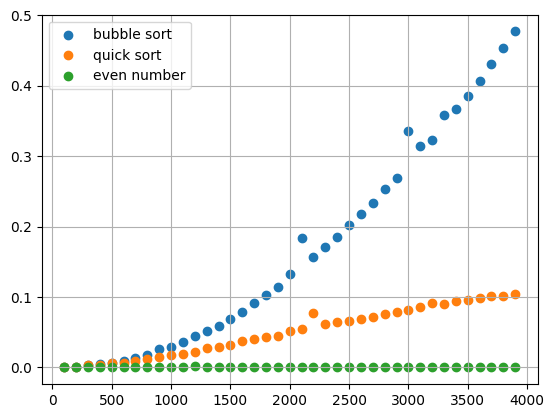

In [54]:
plt.scatter(values, bubble_time_complexity, label="bubble sort")
plt.scatter(values, quick_time_complexity, label='quick sort')
plt.scatter(values, even_numbers_complexity, label='even number')

plt.grid(True)
plt.legend()
plt.show()


In [55]:
def quad_gradient_descent(a_now, b_now, c_now, x_data, y_data, L):
    a_gradient = 0
    b_gradient = 0
    c_gradient = 0

    n = len(x_data)

    for i in range(n):
        x = x_data[i]
        y = y_data[i]

        a_gradient += -(2/n) * x ** 2 * (y - (a_now * x**2 + b_now * x + c_now))
        b_gradient += -(2/n) * x * (y - (a_now * x**2 + b_now * x + c_now))
        c_gradient += -(2/n) * (y - (a_now * x**2 + b_now * x + c_now))

    a = a_now - a_gradient * L
    b = b_now - b_gradient * L
    c = c_now - c_gradient * L

    return a, b, c

In [56]:
a = 0
b = 0
c = 0
L = 0.00000000000001

epochs = 100000

for i in range(epochs):
    a, b, c = quad_gradient_descent(a, b, c, values, bubble_time_complexity, L)

print(a, b, c)


3.206574603227974e-08 2.5177155452330658e-09 1.0775011266888028e-12


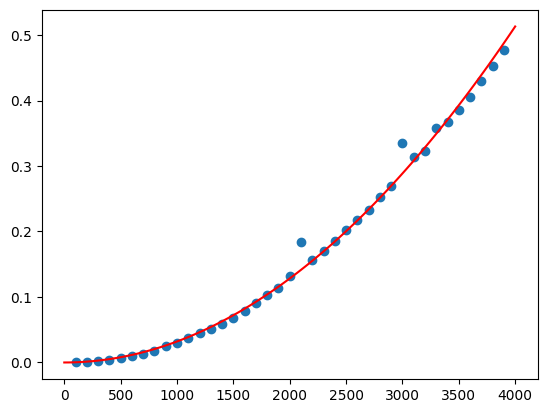

In [57]:
plt.scatter(values, bubble_time_complexity)
x_range = np.linspace(0, 4000, 100)
quadratic_curve = a * x_range**2 + b * x_range + c
plt.plot(x_range, quadratic_curve, color="red")

In [58]:
def x_log_gradient_descent(a_now, b_now, x_data, y_data, L):
    a_gradient = 0
    b_gradient = 0

    n = len(x_data)

    for i in range(n):
        x = x_data[i]
        y = y_data[i]

        # Compute gradients
        a_gradient += -(2/n) * x * np.log(x) * (y - (a_now * x * np.log(x) + b_now))
        b_gradient += -(2/n) * x * (y - (a_now * x * np.log(x) + b_now))

    # Update parameters using gradients and learning rate
    a = a_now - a_gradient * L
    b = b_now - b_gradient * L

    return a, b


In [66]:
a = 0
b = 0
L = 0.000000001

epochs = 100000

for i in range(epochs):
    a, b = x_log_gradient_descent(a, b, values, quick_time_complexity, L)

print(a, b)


3.3565033203766537e-06 -3.57673823756602e-05


C:\Users\mitsi\AppData\Local\Temp\ipykernel_7356\3487485934.py:3: RuntimeWarning: divide by zero encountered in log
  log_curve = a * x_range * np.log(x_range) + b
C:\Users\mitsi\AppData\Local\Temp\ipykernel_7356\3487485934.py:3: RuntimeWarning: invalid value encountered in multiply
  log_curve = a * x_range * np.log(x_range) + b


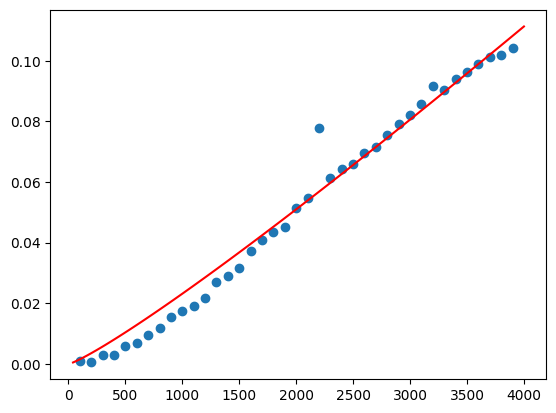

In [67]:
plt.scatter(values, quick_time_complexity)
a_range = np.linspace(100, 4000, 100)
log_curve = a * x_range * np.log(x_range) + b
plt.plot(x_range, log_curve, color="red")